Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing libraries

Pre-Processing

In [3]:
df = pd.read_csv('Fraud.csv') #data

In [4]:
df.shape

(6362620, 11)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
df.isnull().values.any()

False

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.dtypes #to check data types

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
df['isFraud'].value_counts() 
#df['isFraud'].value_counts(normalise=True) 

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
legit_count = len(df[df.isFraud == 0])
fraud_count = len(df[df.isFraud == 1])
legit_percent = (legit_count / (legit_count + fraud_count)) * 100
fraud_percent = (fraud_count / (legit_count + fraud_count)) * 100
print("Count of Legit transactions: ", legit_count)
print("COunt of Fraud transactions: ", fraud_count)
print("Legit count Percentage: {:.2f}%".format(legit_percent))
print("Fraud count Percentage: {:.2f} %".format(fraud_percent))

Count of Legit transactions:  6354407
COunt of Fraud transactions:  8213
Legit count Percentage: 99.87%
Fraud count Percentage: 0.13 %


Visualisation

Visualization of Legit and fraud transactions

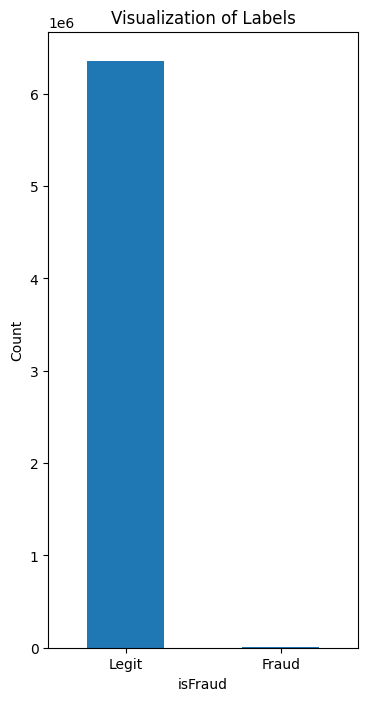

In [12]:
plt.figure(figsize=(4,8))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

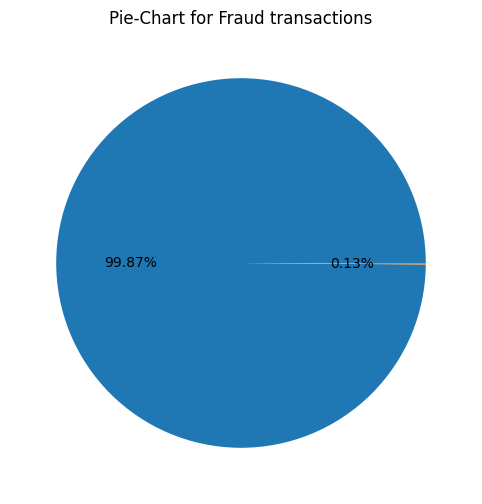

In [13]:
plt.figure(figsize=(10,6))
plt.title('Pie-Chart for Fraud transactions')
plt.pie(df['isFraud'].value_counts(),  autopct='%.2f%%')
plt.show()

In [14]:
((df.loc[df["isFraud"]== 1]).groupby("type").sum())

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,,,
CASH_OUT,1513537,5.989202e+09,C840083671C2101527076C1118430673C749981943C467...,5.984125e+09,2.987676e+05,C38997010C1007251739C339924917C667346055C71608...,4.465524e+09,1.049393e+10,4116,0
TRANSFER,1512246,6.067213e+09,C1305486145C1420196421C137533655C1334405552C13...,7.564595e+09,1.579822e+09,C553264065C972765878C1848415041C431687661C1136...,4.397652e+06,1.631184e+07,4097,16


Text(0, 0.5, 'Is Fraud')

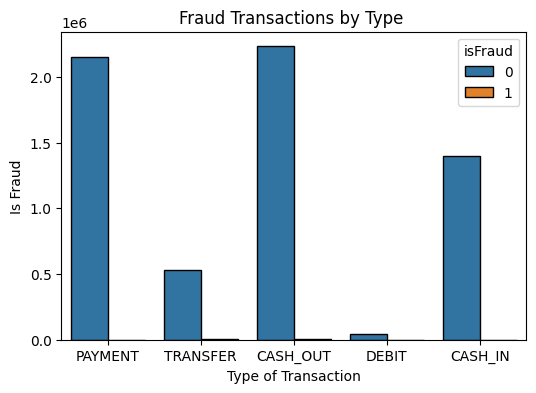

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='type',hue='isFraud',data=df,edgecolor="black")
plt.title("Fraud Transactions by Type ")
plt.xlabel("Type of Transaction")
plt.ylabel("Is Fraud")

In [16]:
((df.loc[df["isFlaggedFraud"]== 1]).groupby("type").sum())

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,,,
TRANSFER,8601,77785563.69,C728984460C1100582606C1035541766C908544136C689...,1.250859e+08,1.250859e+08,C639921569C1147517658C1100697970C891140444C139...,0.0,0.0,16,16


Text(0, 0.5, 'is Flagged Fraud')

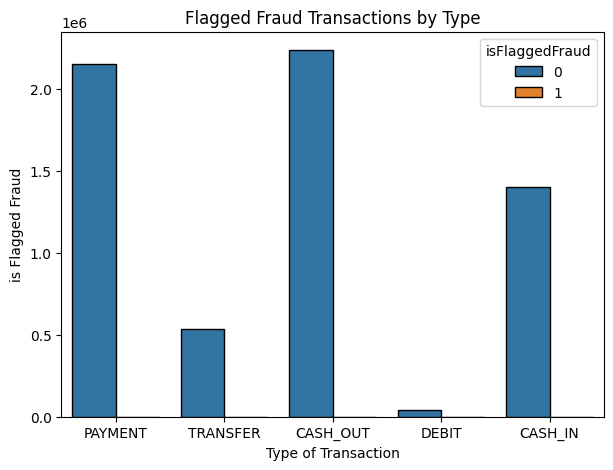

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(x='type',hue='isFlaggedFraud',data=df,edgecolor="black")
plt.title("Flagged Fraud Transactions by Type")
plt.xlabel("Type of Transaction")
plt.ylabel("is Flagged Fraud")

In [18]:
print("Shape : ",(df.loc[(df["isFraud"] == 1 ) & (df["isFlaggedFraud"] == 1 )]).shape)
df.loc[(df["isFraud"] == 1 ) & (df["isFlaggedFraud"] == 1 )]

Shape :  (16, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [19]:
#Creating a copy of DataFrame
dupes = df.copy()

In [20]:
dupes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [21]:
#Label encoder
objList = dupes.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [22]:
#object to numeric

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dupes[feat] = le.fit_transform(dupes[feat].astype(str))

In [23]:
print(dupes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [24]:
dupes.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


MulticolinearitModel Training

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [31]:
dupes["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [32]:
X = dupes.drop(columns=['isFraud'])
Y = dupes['isFraud']

In [35]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 10)
Shape of X_test:  (1908786, 10)


In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

pred_logreg = logreg.predict(X_test)


c:\Users\Navaneeth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


conf_logreg = confusion_matrix(Y_test , pred_logreg)
print("Confusion Matrix :")
print(conf_logreg)
print(" ")
print("Accuracy    :", accuracy_score( Y_test, pred_logreg ) * 100)
print("Precision   :", precision_score( Y_test, pred_logreg ) * 100)
print("TPR/ Recall :", recall_score( Y_test, pred_logreg ) * 100)
print("FPR         :", conf_logreg[0][1] / ( conf_logreg[0][1] * conf_logreg[0][0] ) *100)
print("F1_Ratio    :", f1_score( Y_test, pred_logreg ) * 100)

Confusion Matrix :
[[1906060     291]
 [   1364    1071]]
 
Accuracy    : 99.91329567589034
Precision   : 78.63436123348018
TPR/ Recall : 43.983572895277206
FPR         : 5.2464245616612286e-05
F1_Ratio    : 56.412957598103766


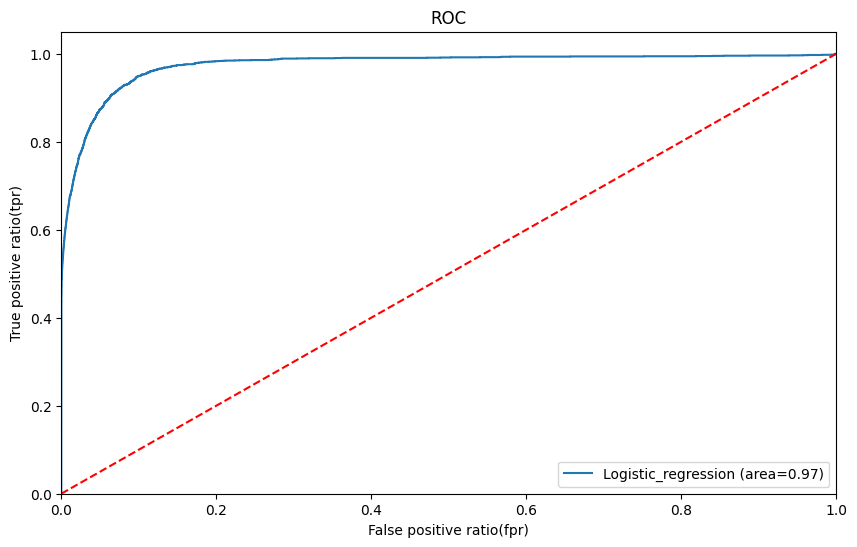

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve


logit_roc_auc=roc_auc_score(Y_test,logreg.predict_proba(X_test)[:,1])
fpr,tpr,thresholds=roc_curve(Y_test,logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="Logistic_regression (area=%0.2f)"% logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive ratio(fpr)")
plt.ylabel("True positive ratio(tpr)")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score

In [47]:
cvs = cross_val_score(logreg,X,Y,cv=3)
cvs.mean()

c:\Users\Navaneeth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9985513831240441

In [49]:
dupes

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [50]:
dupes.drop(["nameOrig","nameDest"],inplace=True,axis=1)

In [51]:
dupes.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [52]:
dupes.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.0,0.00,0.00,1,0
6362619,743,1,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0


In [59]:
X_new = dupes.iloc[:,:-1]
Y_new = dupes.iloc[:,-1]

In [61]:
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new, Y_new, test_size=0.30, random_state=19)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_new_train = scaler.fit_transform(X_new_train)
X_new_test = scaler.transform(X_new_test)

In [63]:
logreg_new = LogisticRegression()

logreg_new.fit(X_new_train, Y_new_train)

pred_new_logreg = logreg_new.predict(X_new_test)

In [64]:
conf_new_logreg = confusion_matrix(Y_new_test , pred_new_logreg)
print("Confusion Matrix :")
print(conf_logreg)
print(" ")
print("Accuracy    :", accuracy_score(Y_new_test , pred_new_logreg) * 100)
print("Precision   :", precision_score(Y_new_test , pred_new_logreg) * 100)
print("TPR/ Recall :", recall_score(Y_new_test , pred_new_logreg) * 100)
print("FPR         :", conf_new_logreg[0][1] / ( conf_new_logreg[0][1] * conf_new_logreg[0][0] ) *100)
print("F1_Ratio    :", f1_score(Y_new_test , pred_new_logreg) * 100)

Confusion Matrix :
[[1906060     291]
 [   1364    1071]]
 
Accuracy    : 99.99984283204088


c:\Users\Navaneeth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision   : 0.0
TPR/ Recall : 0.0
FPR         : nan


C:\Users\Navaneeth\AppData\Local\Temp\ipykernel_4972\911058314.py:8: RuntimeWarning: invalid value encountered in scalar divide
  print("FPR         :", conf_new_logreg[0][1] / ( conf_new_logreg[0][1] * conf_new_logreg[0][0] ) *100)


F1_Ratio    : 0.0


Here accuracy is 99.99. Previously it was 99.92 so this shows improvement.